# Data Profiling

Import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils

import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [2]:
df = pd.read_csv("50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Info Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Check Missing Value

In [5]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Data Cleansing

data is clean

# Exploratory Data Analysis

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


maksimal profit 192k

rata - rata 110k

min profit 14k

<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

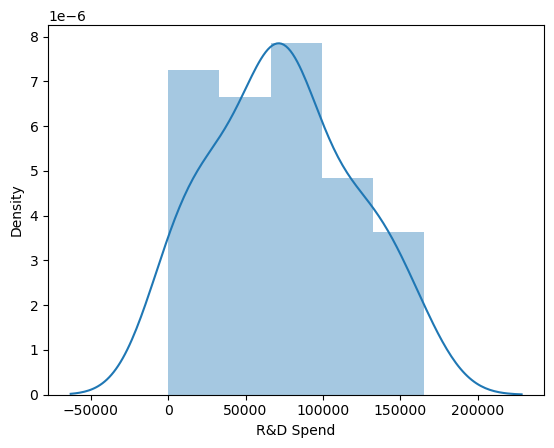

In [7]:
sns.distplot(df["R&D Spend"])

<AxesSubplot:xlabel='Administration', ylabel='Density'>

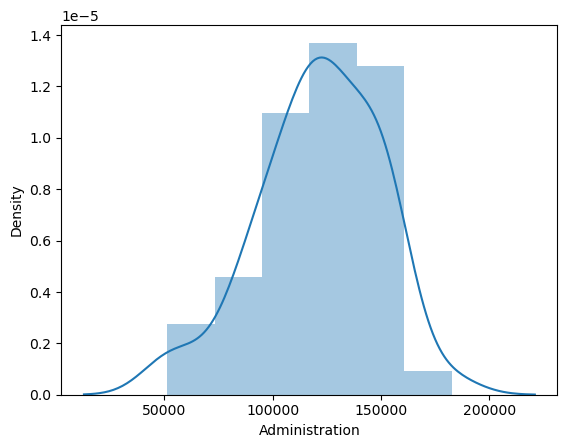

In [8]:
sns.distplot(df["Administration"])

<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

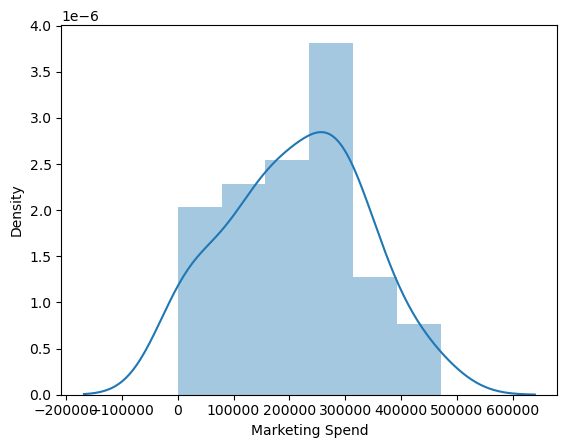

In [9]:
sns.distplot(df["Marketing Spend"])

<AxesSubplot:xlabel='Profit', ylabel='Density'>

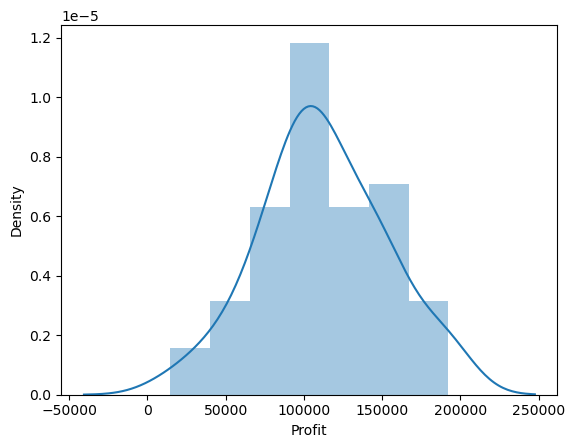

In [10]:
sns.distplot(df["Profit"])

Text(0.5, 1.0, 'City')

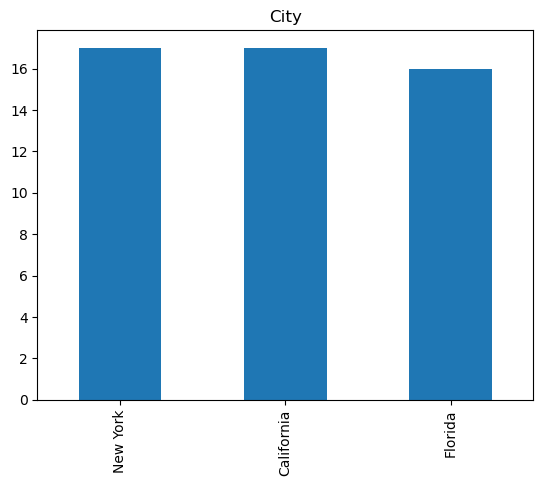

In [11]:
df['State'].value_counts().plot(kind='bar')
plt.title('City')

<AxesSubplot:xlabel='State', ylabel='R&D Spend'>

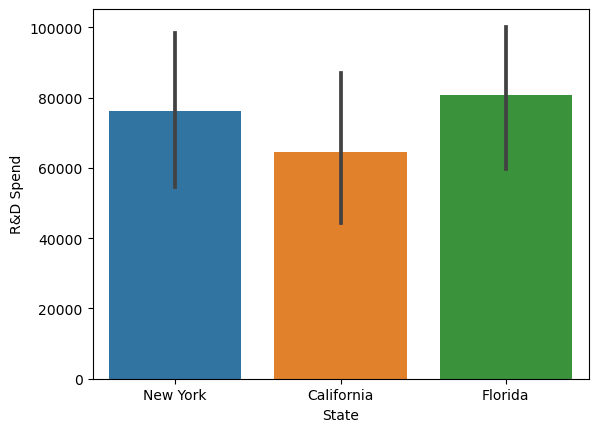

In [12]:
#profit vs state
sns.barplot(x='State', y='R&D Spend', data=df)

<AxesSubplot:xlabel='State', ylabel='Profit'>

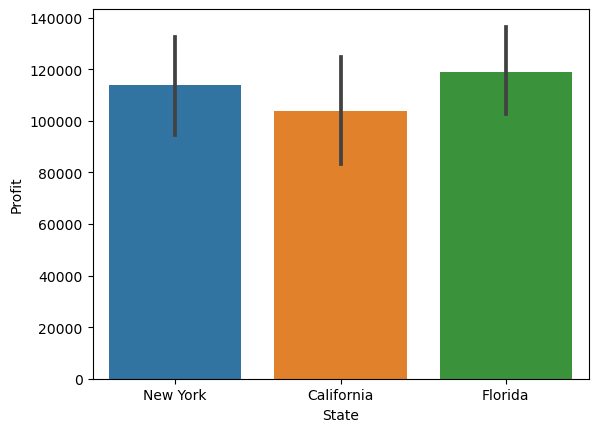

In [13]:
#profit vs state
sns.barplot(x='State', y='Profit', data=df)

FINDING MULTICOLINEARITY

<AxesSubplot:>

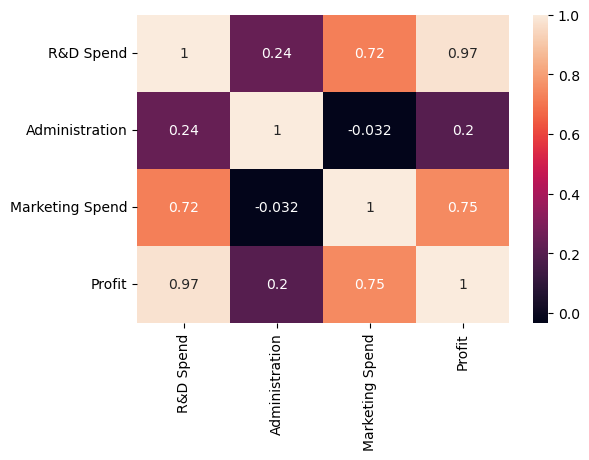

In [15]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot=True)
# it's known that R&D and Marketting spend are multicolon therefore that feature need to be taken down or dropped

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

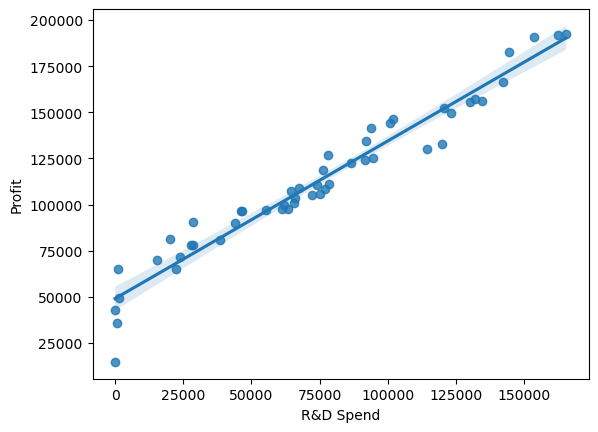

In [16]:
import seaborn as sns
# R&D Spend as potential predictor variable of price
sns.regplot(x="R&D Spend", y="Profit", data=df)

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

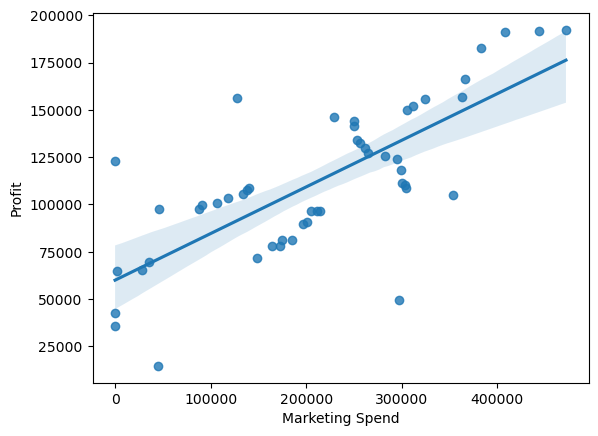

In [17]:
# R&D Spend as potential predictor variable of price
sns.regplot(x="Marketing Spend", y="Profit", data=df)

# Feature Engineering

ONE HOT ENCODING

In [18]:
# pake onehot encoding karena kategorikal
state_enc  = pd.get_dummies(df['State'], prefix = 'State', drop_first = False)
df.drop(['State'], axis = 1, inplace = True)
df = pd.concat([df, state_enc], axis=1)

In [19]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


Scaling Administration feature with Standard Scaler

In [20]:
scaler = StandardScaler()
df['Administration']=scaler.fit_transform(df[['Administration']])
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,0.560753,471784.10,192261.83,0,0,1
1,162597.70,1.082807,443898.53,191792.06,1,0,0
2,153441.51,-0.728257,407934.54,191050.39,0,1,0
3,144372.41,-0.096365,383199.62,182901.99,0,0,1
4,142107.34,-1.079919,366168.42,166187.94,0,1,0


# Preprocessing modelling

- Feature Selection

In [39]:
#Drop Multicollinear
df.drop('R&D Spend', axis=1, inplace=True)

KeyError: "['R&D Spend'] not found in axis"

In [47]:
#Drop Multicollinear
df.drop('Marketing Spend', axis=1, inplace=True)

KeyError: "['Marketing Spend'] not found in axis"

- Feature Importance

In [48]:
#feature importance
X = df.drop(["Profit"],axis=1) # X are data or feature we want to train
y = df["Profit"] # is the solution key which used to be compared with trained or predicted data

* Split Training and Test Set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 1/5, random_state = 42)
# 1/3 karena data kecil, hanya 10 test dari 30

# Machine Learning Regression - Simple Linear Regression

In [32]:
regressor = LinearRegression()
# regressor as a variable with linear regression model 

* Fitting into Training 

In [33]:
regressor.fit(X_train, y_train)
# disini data latihnya adalah YearExperience

LinearRegression()

In [34]:
regressor.coef_

array([ -7781.74148636, -23257.5773514 ,  45586.67533959, -22329.09798819])

- Predict The Result

In [41]:
y_pred = regressor.predict(X_test)

* Plot the Result

In [43]:
result = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
result

,Actual,Predict
13,134307.35,60788.258247
39,81005.76,75521.433406
30,99937.59,135202.740729
45,64926.08,64898.886379
17,125370.37,59028.244245
48,35673.41,85214.389186
26,105733.54,127208.195263
25,107404.34,59649.710200
32,97427.84,62548.917257
19,122776.86,56661.269942


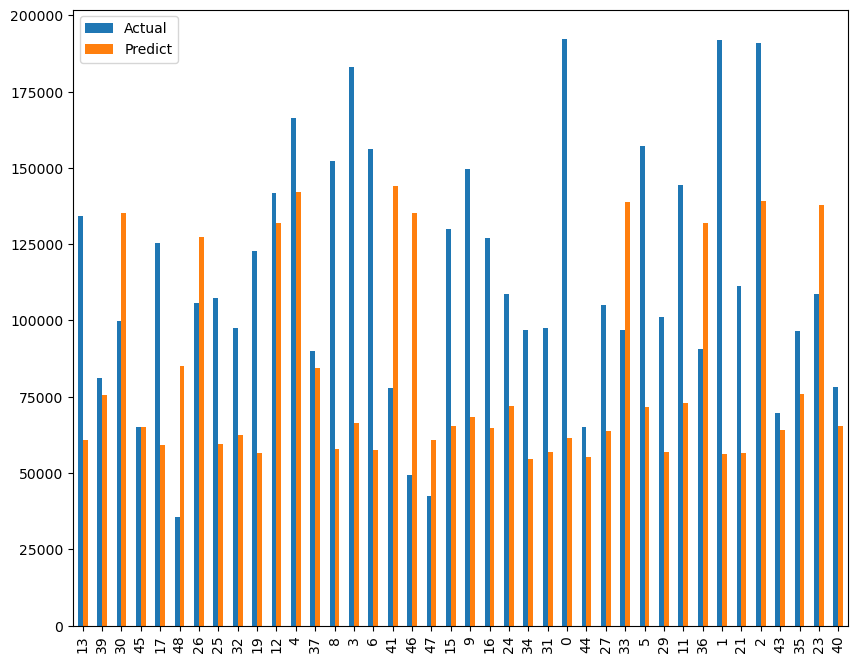

In [44]:
result.plot(kind = "bar", figsize = (10, 8))
plt.show()

^ antara prediksi dengan actual perbandingannya seperti itu

# Evaluate Model

In [45]:
mean_absolute_error(y_test, y_pred)

50573.725137326524

In [46]:
mean_absolute_percentage_error(y_test, y_pred)

0.4526793920302089